In [19]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sns.set_context('talk', font_scale=1.4)
sns.set(rc={'figure.figsize': (25, 15)})

red = pd.read_csv('winequality/winequality-red.csv', sep=";")
white = pd.read_csv('winequality/winequality-white.csv', sep=";")

# concat two data sets
red['type'] = 'red'
white['type'] = 'white'
all_wine = pd.concat([red, white], ignore_index=True)

all_wine['quality_label'] = all_wine['quality'].apply(
    lambda value: 'low'
    if value <= 5 else 'medium'
    if value <= 7 else 'high'
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
display(all_wine.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'quality_label'],
      dtype='object')

In [24]:
display(all_wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,medium
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,low
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,medium
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,medium


In [26]:
# make a copy of our original data set, so the manipulations would not affect it
x = all_wine.copy(deep=True)

# leave only fields that are not correlated with each other for the training
X = x[[
    'residual sugar',
    'chlorides',
    'total sulfur dioxide',
    'pH',
    'sulphates',
    'alcohol'
]]

# what field are we trying to predict?
y = all_wine['type']

print(X.shape)
print(y.shape)

(6497, 6)
(6497,)


In [22]:
# split the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

model = LogisticRegression()                    # 2. instantiate model
model.fit(X_train, y_train)                     # 3. fit model to data
y_model = model.predict(X_test)                 # 4. predict on new data
print(accuracy_score(y_test, y_model))

0.9615384615384616


/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


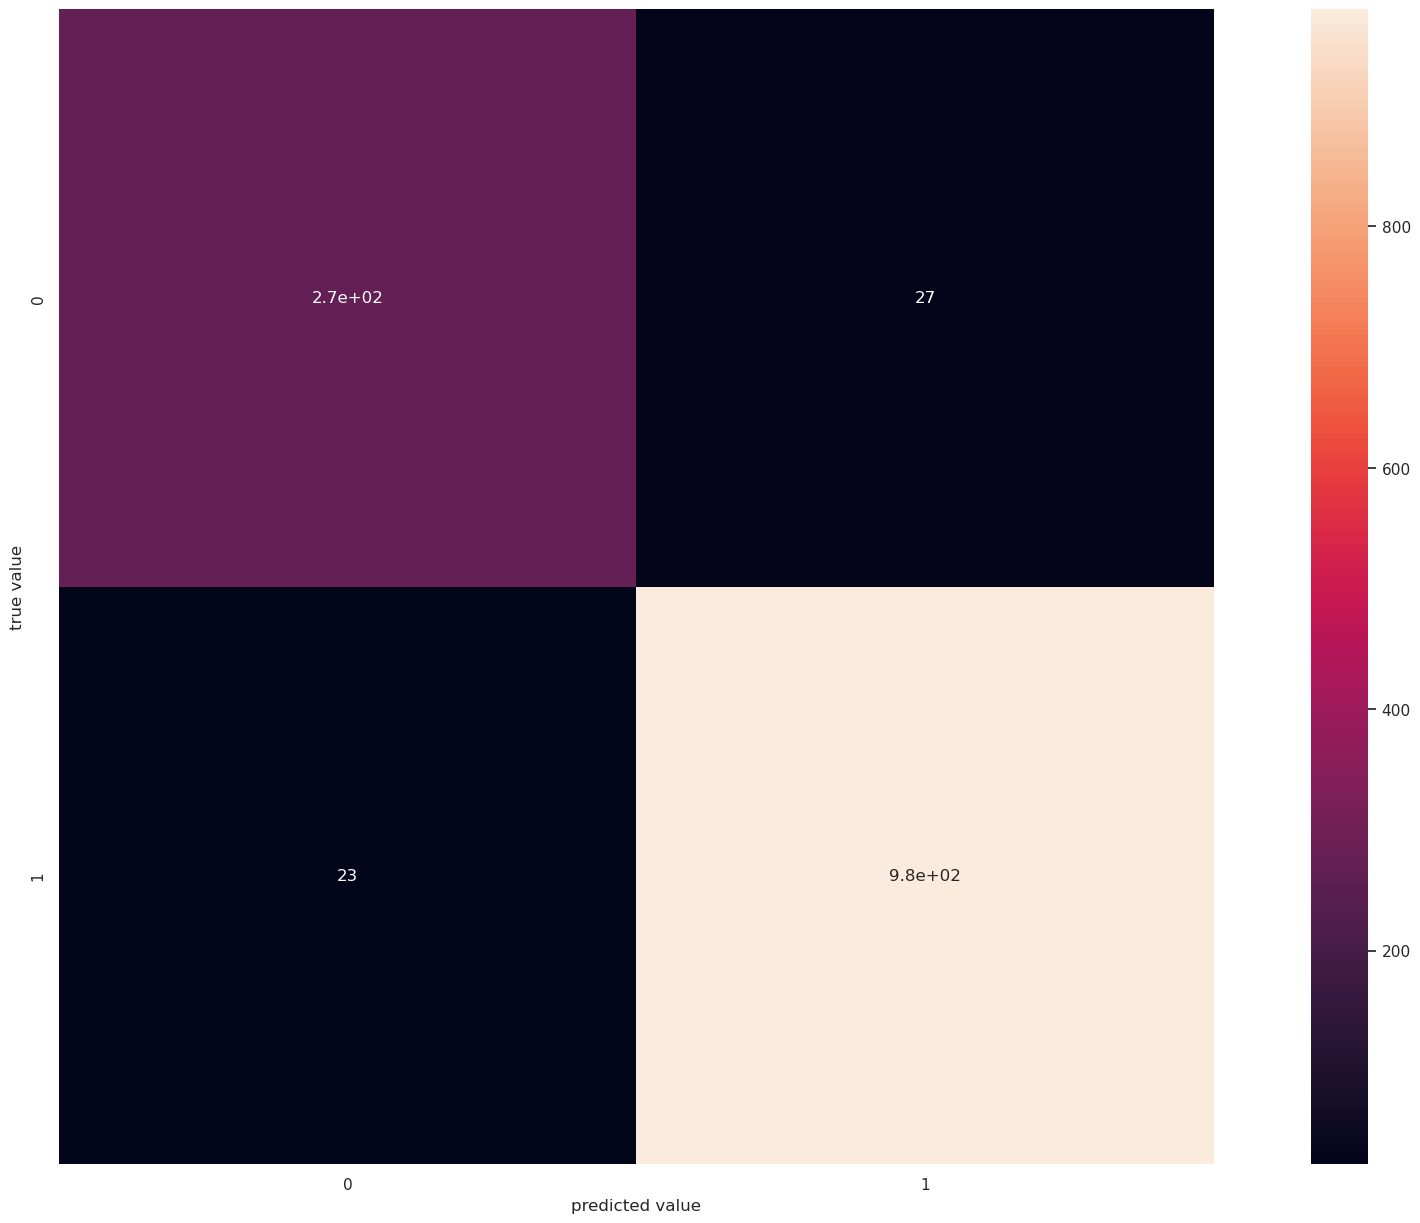

In [23]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)

sns.heatmap(mat, square=True, annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');